In [1]:
import os
import io
import sys
import numpy as np
import pandas as pd
import researchpy as rp

In [3]:
dataset_path = "classes"
ids = []
severity = []
classes = []
for subdir, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.txt'):
            file_path = os.path.join(subdir, file)
            text = io.open(file_path, "r", encoding="ISO-8859-1").readlines()
            ids.append(file.split('.')[0])
            classes.append(''.join(text))
            if subdir.endswith('none'):
                severity.append('none')
            elif subdir.endswith('major'):
                severity.append('major')
            elif subdir.endswith('minor'):
                severity.append('minor')
            elif subdir.endswith('critical'):
                severity.append('critical')

In [4]:
data_dict = {'sample_id': ids, 'severity': severity, 'method': classes} 
df = pd.DataFrame(data_dict)
df['sample_id'] = df['sample_id'].astype('int')
print(df.shape[0])
df.head()

2159


,sample_id,severity,method
0,4432196,major,@JsonSerialize(include = JsonSerialize.Inclusi...
1,7391055,major,@Value\npublic class Release {\n\n\tprivate fi...
2,4687786,major,public class GroomServerStatus implements Writ...
3,3797964,major,public static class Value {\n int ...
4,5339993,major,public class InstantiatedVersionedLabel extend...


In [5]:
rp.summary_cat(df["severity"])

,Variable,Outcome,Count,Percent
0,severity,none,1875,86.85
1,,minor,139,6.44
2,,major,115,5.33
3,,critical,30,1.39


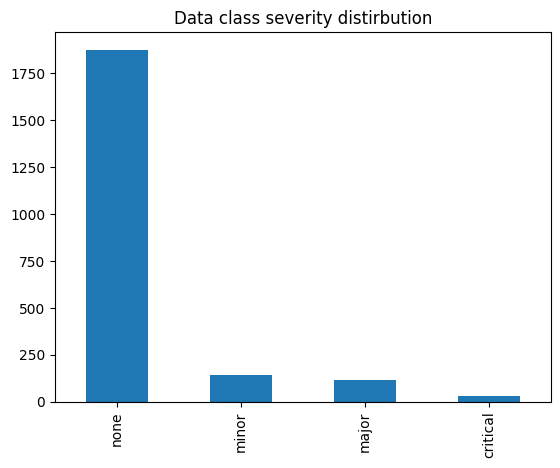

In [6]:
import matplotlib.pyplot as plt
df.severity.value_counts().plot(kind='bar')
plt.title("Data class severity distirbution")
plt.show()

In [7]:
df = df[df['method'] != '']
df.to_csv('./data_class.csv', index=False)
df.shape

(2159, 3)